<font size="5">***IMPORT NECESSARY LIBRARIES***</font><br>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import streamlit as st
import plotly.express as px
from dash import html, dcc, Input, Output
import dash
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

#to make sure all libraries are installed, run in your terminal -> pip install -r requirements.txt


<font size="5">***DATA ACQUISITION***</font><br>

Reading Data From csv file and converting non-numeric data to numeric data

In [29]:
#Data Acquisition
df = pd.read_csv("student_data.csv")

#Detect non-numeric datatypes
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print (non_numeric_columns)

# Convert non-numeric columns into numerical values using Label Encoding
label_encoders = LabelEncoder()
for col in non_numeric_columns:
    df[col] = label_encoders.fit_transform(df[col])


df['average'] = df[['G1', 'G2', 'G3']].mean(axis=1)
# step 2: Dropping the original G1, G2, G3 columns
df = df.drop(columns=['G1', 'G2', 'G3'])
# display the first few rows to verify the changes
print(df.head())
X_features = df.drop(columns=['average'])
Target = df.iloc[:, -1]
#Data Description
#df.info()
df.describe()


['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         0         0       4         3      4     1     1       3         4   
1         1         0       5         3      3     1     1       3         2   
2         1         0       4         3      2     2     3       3         6   
3         1         1     

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,average
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.941448,2.224961,...,0.767334,0.368259,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.625064
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,...,0.422857,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.833360
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.666667
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.666667


<font size="5">***DATA WRANGLING***</font><br>

In [30]:
#Data Cleaning

#Check for null values
print(df.isnull().sum())
print ("\n***There are no missing/null values***\n")


# 2 Remove Duplicates
non_duplicate = df[~df.duplicated(df.columns)]
print (non_duplicate)
print ("\n***There are no duplicates***\n")

print ("***The data set is clean , we will use as it is***\n")

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
average       0
dtype: int64

***There are no missing/null values***

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0      

<font size="5">***CORRELATION MATRIX***</font><br>

Correlation Matrix:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,average
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.295035
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.118333
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.133499
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,0.175794,-0.030939,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.167455
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.045694
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.059754,-0.053828,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.011045
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.265905
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.227918
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.260658,-0.074286,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.167727
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.088625,-0.002835,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.085200


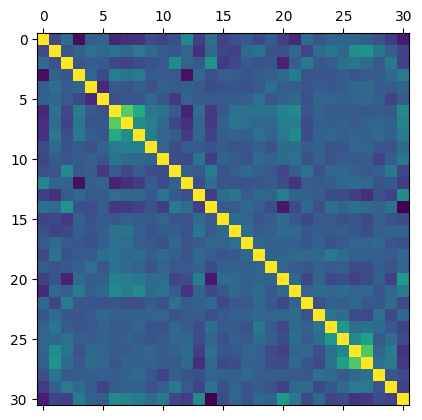

In [55]:
#Finding correlation matrix of all variables
correlation_matrix = df.corr()                       

print("Correlation Matrix:")

plt.matshow(correlation_matrix)
df.corr()

**Defining the contributing Dataset according to Correlation Matrix**

In [50]:
#Deciding which features attribute to our Target "average"
average_Corr = correlation_matrix.columns[-1]

Correlation_Relevant = []
for feature in correlation_matrix.columns[:-1]:  # Exclude the last variable
    if abs(correlation_matrix.loc[feature,average_Corr]) > 0.2:
        Correlation_Relevant.append(feature)
        
print("Features contributing to our target according to the Correlation matrix:", Correlation_Relevant)
Relevant_DataSet_corr =df[Correlation_Relevant]
Relevant_DataSet_corr['average']=Target
#Our New DataSet "Relevant_DataSet"
#print(Relevant_DataSet)

Features contributing to our target according to the Correlation matrix: ['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc']


<font size="5">***Linear Regression***</font><br>

In [51]:
#calculating r2 adjusted functionn
def adj_r2(X, y, model):
        r2 = model.score(X, y)
        n = X.shape[0]
        p = X.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        return adjusted_r2

In [52]:
# Function to calculate the standard error (SE)
def calculate_standard_error(Y_target, Y_predicted, X_test, feature_variables):
    N = len(Y_target)
    residuals = Y_target - Y_predicted
    SSE = np.sum(residuals**2)
        
    feature_avg = np.mean(X_test, axis=0)
    SST = np.sum((X_test - feature_avg)**2, axis=0)
        
    SE = np.sqrt(SSE / (N - 2)) / np.sqrt(np.sum(SST))
    return SE
    

def linear_model_creator(df, feature_variables, target_variable, test_size=0.2, normalize=False):
    
    # extracting the wanted features (X) and target variable (Y)
    X = np.array(df[feature_variables])
    Y = np.array(df[target_variable]).reshape(-1, 1)  # reshaping Y to 2D array for scaling

    # optionally normalize the data
    if normalize:
        scaler_X = StandardScaler()
        scaler_Y = StandardScaler()
        X = scaler_X.fit_transform(X)
        Y = scaler_Y.fit_transform(Y)
   
    # dividing the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
       
    # creating the Linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    # creating predictions with the model
    predictions = lm.predict(X_test)
   
    # unnormalize the predictions if data was normalized
    if normalize:
        predictions = scaler_Y.inverse_transform(predictions)
        Y_test = scaler_Y.inverse_transform(Y_test)
   
    # creating the DataFrame with the used features, the target variable, and the predicted data
    dictionary = {}
    for feature in feature_variables:
        dictionary[feature] = X_test[:, feature_variables.index(feature)]

    lm_results = pd.DataFrame.from_dict(dictionary)
    lm_results["Y_target"] = Y_test.flatten()  # flattening Y_test to 1D array
    lm_results["Y_predicted"] = predictions.flatten()  # flattening predictions to 1D array
   
    # plotting the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(lm_results["Y_target"], lm_results["Y_predicted"], color='blue')
    plt.title(f'Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
    # evaluating the model
    print("Target:", target_variable)
    print("Features:", feature_variables)
    print("The accuracy (R²) of the Model train is:", lm.score(X_train, Y_train))
    print("The accuracy (R²) of the Model test is:", lm.score(X_test, Y_test))
    print('The accuracy (MSE) of the train Model is: %.2f' % mean_squared_error(Y_train, lm.predict(X_train)))
    print('The accuracy (MSE) of the test Model is: %.2f' % mean_squared_error(Y_test, predictions))
    print("The intercept (alpha) is:", lm.intercept_)
    print("The coefficients (betas) are:", lm.coef_)
    
    # calculating and printing the standard error (SE)
    SE = calculate_standard_error(lm_results["Y_target"], lm_results["Y_predicted"], X_test, feature_variables)
    print("The Standard Error (SE) is:", SE)
   
    return lm_results

We will first try to predict our target variable using features with correlation threshold > 0.2

The model works really well but let's try to increase the accuracy further by including more features.

#This shows that even though we used more features, the model accuracy changed by a really small percentage as the features we added have a weak correlation with the target variable. However, we will use this model as it provides higher accuracy.# (not yet sure of this comment)

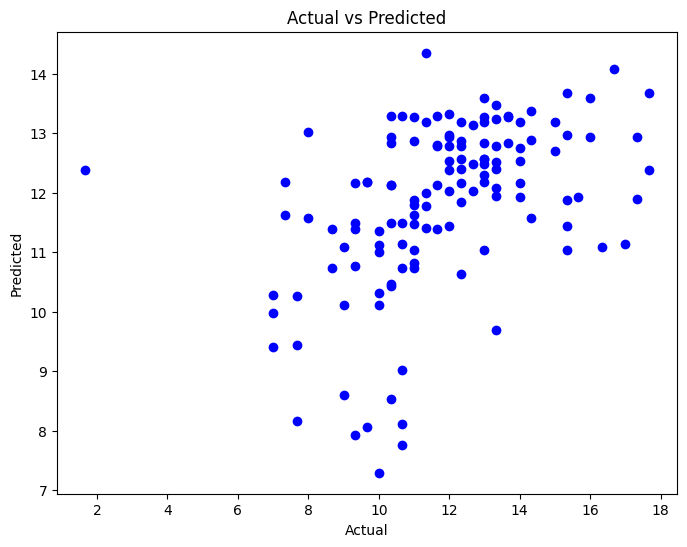

Target: average
Features: ['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc']
The accuracy (R²) of the Model train is: 0.3405481626989806
The accuracy (R²) of the Model test is: 0.19286294773182877
The accuracy (MSE) of the train Model is: 5.51
The accuracy (MSE) of the test Model is: 5.34
The intercept (alpha) is: [9.64365135]
The coefficients (betas) are: [[-0.99752934  0.44638903 -0.09165471  0.39739858 -1.32313728  1.74335354
  -0.40721238]]
The Standard Error (SE) is: 0.10055600716155957


,school,Medu,Fedu,studytime,failures,higher,Dalc,Y_target,Y_predicted
0,1,2,1,2,0,1,1,8.000000,11.578184
1,0,0,2,3,0,1,2,14.333333,11.581466
2,0,3,4,2,0,1,3,15.666667,11.932713
3,1,2,3,1,0,1,1,10.000000,10.997476
4,1,2,3,1,1,0,1,9.333333,7.930985
...,...,...,...,...,...,...,...,...,...
125,0,2,1,2,0,1,2,14.000000,12.168501
126,0,4,2,2,0,1,1,14.333333,13.376836
127,1,2,2,3,0,1,1,15.333333,11.883928
128,1,2,2,1,0,0,3,10.333333,8.531352


In [58]:
#linear regression for features contributing from correlation matrix pov
linear_model_creator(df, Correlation_Relevant, 'average', test_size = 0.2)


<font size="5">***Hypothesis Testing***</font><br>

Hypothesis Testing for further testing on the data set contributing to the target variable that we got from correlation analysis

In [37]:
def z_test(betas, se):
    # Calculate z-score
    z_scores = np.array(betas) / np.array(se)
    
    # Calculate two-tailed p-values
    p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))
    
    # Determine significance based on p-value
    significance = p_values < 0.1
    
    # Print significance message for each coefficient
    for i, sig in enumerate(significance):
        if sig:
            print(f"Beta {i+1} is significant (p-value < 0.1): z-score = {z_scores[i]}, p-value = {p_values[i]}")
    
    return z_scores, p_values


In [38]:
#features contributing from correlation matrix pov
betas = [-0.99752934, 0.44638903, -0.09165471, 0.39739858, -1.32313728, 1.74335354, -0.40721238]
se = 0.10055600716155957

# Perform z-test
z_scores, p_values = z_test(betas, se)

# Print results
print("\nZ-scores and P-values:")
for i in range(len(betas)):
    print(f"Beta {i+1}: z-score = {z_scores[i]}, p-value = {p_values[i]}")


Beta 1 is significant (p-value < 0.1): z-score = -9.920136729348322, p-value = 0.0
Beta 2 is significant (p-value < 0.1): z-score = 4.439207985683078, p-value = 9.029053008369203e-06
Beta 4 is significant (p-value < 0.1): z-score = 3.952012328428222, p-value = 7.749674705603837e-05
Beta 5 is significant (p-value < 0.1): z-score = -13.158212197846767, p-value = 0.0
Beta 6 is significant (p-value < 0.1): z-score = 17.337139661870413, p-value = 0.0
Beta 7 is significant (p-value < 0.1): z-score = -4.049607691221739, p-value = 5.130356506621858e-05

Z-scores and P-values:
Beta 1: z-score = -9.920136729348322, p-value = 0.0
Beta 2: z-score = 4.439207985683078, p-value = 9.029053008369203e-06
Beta 3: z-score = -0.9114792103145246, p-value = 0.36204293472800764
Beta 4: z-score = 3.952012328428222, p-value = 7.749674705603837e-05
Beta 5: z-score = -13.158212197846767, p-value = 0.0
Beta 6: z-score = 17.337139661870413, p-value = 0.0
Beta 7: z-score = -4.049607691221739, p-value = 5.13035650662

We notice from our hypothesis testing results that the features selected as contributing features are really contributing effectively to the target variable

<font size="5">***Ridge Regression***</font><br>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

selected_features=['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc']
X_features = df[selected_features]
y = df['average']

# Split the data into training and testing sets
def ridge_regression(X_features, y, Alpha):
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

    # Standardize the feature variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Ridge Regression model
    ridge_model = Ridge(alpha=Alpha)
    ridge_model.fit(X_train_scaled, y_train)

    # Predict on the testing set
    y_pred = ridge_model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    r2=r2_score(y_test, y_pred)
    print(f"R2: {r2}")


In [40]:
ridge_regression(X_features,y,0)

Mean Squared Error: 6.837125117253835
R2: 0.192488111396109


In [41]:
ridge_regression(X_features,y,0.1)

Mean Squared Error: 6.837071621778663
R2: 0.19249442958269292


In [42]:
ridge_regression(X_features,y,10)

Mean Squared Error: 6.832161677931082
R2: 0.19307432799925006


In [43]:
ridge_regression(X_features,y,100)

Mean Squared Error: 6.8151467057993225
R2: 0.19508391419886295


<font size="5">***Polynomial Regression***</font><br>

In [60]:
def polynomial_regression(X_features, y, Degree):
    # Encode categorical features (e.g., 'school' and 'higher')
    X_features = pd.get_dummies(X_features, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

    # Standardize the feature variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=Degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train the Polynomial Regression model (Linear Regression on polynomial features)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predict on the testing set
    y_pred = poly_model.predict(X_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


In [45]:
polynomial_regression(X_features, y, 2)

Mean Squared Error: 7.088476278843024
R^2 Score: 0.1628017962099989


In [46]:
polynomial_regression(X_features, y, 3)

Mean Squared Error: 12.131937995323767
R^2 Score: -0.43286600654809804


In [47]:
polynomial_regression(X_features, y, 4)

Mean Squared Error: 8.949423765429014e+24
R^2 Score: -1.0569890067538789e+24


In [48]:
polynomial_regression(X_features, y, 1)

Mean Squared Error: 6.8371251172538345
R^2 Score: 0.1924881113961091
